# Topic Similarity

DS 5001 Text as Data

**Purpose:** To explore topc similarity in various vector spaces.

# Set Up

## Imports

In [1]:
import pandas as pd
import numpy as np
import plotly_express as px
import seaborn as sns; sns.set()

In [2]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import normalize

## Config

In [3]:
import configparser
config = configparser.ConfigParser()
config.read("../../../env.ini")
data_home = config['DEFAULT']['data_home']
output_dir = config['DEFAULT']['output_dir']
local_lib = config['DEFAULT']['local_lib']

In [40]:
import sys; sys.path.append(local_lib)
from hac2 import HAC

In [15]:
data_prefix = 'austen-melville'
colors = "YlGnBu"
n_topics = 40
# OHCO = ['book_id','chap_id']
OHCO = ['book_id', 'chap_id', 'para_num', 'sent_num', 'token_num']

# Get the Data

In [18]:
DOCS = pd.read_csv(f"{output_dir}/{data_prefix}-LDA_DOCS-chaps.csv").set_index(OHCO[:2])
TOPICS = pd.read_csv(f"{output_dir}/{data_prefix}-LDA_TOPICS-{n_topics}.csv").set_index('topic_id')
THETA = pd.read_csv(f"{output_dir}/{data_prefix}-LDA_THETA-{n_topics}.csv").set_index(OHCO[:2])
PHI = pd.read_csv(f"{output_dir}/{data_prefix}-LDA_PHI-{n_topics}.csv").set_index('topic_id')

In [76]:
LIB = pd.read_csv(f'{output_dir}/{data_prefix}-LIB_LABELS.csv').set_index('book_id')

Create a short label for each author for display purposes.

In [77]:
LIB['author_key'] = LIB.author.str.split(', ').str[0].str.lower()

In [79]:
LIB.head()

source_file_path        author  \
book_id                                                                    
105      /sfs/gpfs/tardis/home/rca2t/Documents/MSDS/DS5...  AUSTEN, JANE   
121      /sfs/gpfs/tardis/home/rca2t/Documents/MSDS/DS5...  AUSTEN, JANE   
141      /sfs/gpfs/tardis/home/rca2t/Documents/MSDS/DS5...  AUSTEN, JANE   
158      /sfs/gpfs/tardis/home/rca2t/Documents/MSDS/DS5...  AUSTEN, JANE   
161      /sfs/gpfs/tardis/home/rca2t/Documents/MSDS/DS5...  AUSTEN, JANE   

                         title                   chap_regex  book_len  \
book_id                                                                 
105                 PERSUASION              ^Chapter\s+\d+$     83624   
121           NORTHANGER ABBEY              ^CHAPTER\s+\d+$     77601   
141             MANSFIELD PARK        ^CHAPTER\s+[IVXLCM]+$    160378   
158                       EMMA  ^\s*CHAPTER\s+[IVXLCM]+\s*$    160926   
161      SENSE AND SENSIBILITY              ^CHAPTER\s+\d+$    119873   

         n_chaps                               label  y_raw_2  y_L0_2  y_L1_2  \
book_id                                                                         
105           24            Austen: Persuasion (105)        0       1       1   
121           31      Austen: Northanger Abbey (121)        0       1       1   
141           48        Austen: Mansfield Park (141)        0       0       1   
158           55                  Austen: Emma (158)        0       1       1   
161           50  Austen: Sense And Sensibilit (161)        0       1       1   

         y_L2_2  y_raw_4  y_L0_4  y_L1_4  y_L2_4  kendall_sum author_key  
book_id                                                                   
105           1        2       0       3       2     7.020240     austen  
121           1        2       0       2       2     7.039617     austen  
141           1        2       0       3       2     7.021093     austen  
158           1        2       0       3       2     6.974829     austen  
161           1        2       0       3       2     7.145034     austen

# Topic Pairs

In [80]:
from scipy.spatial.distance import pdist

In [81]:
tpairs_idx = [(a, b) for a, b in pd.MultiIndex.from_product([TOPICS.index, TOPICS.index]) if a < b]

In [82]:
TPAIRS = pd.DataFrame(tpairs_idx, columns=['topic_id_x', 'topic_id_y']).set_index(['topic_id_x', 'topic_id_y'])

Similarity in THETA space.

In [83]:
TPAIRS['theta_cityblock'] = pdist(THETA.T, 'cityblock')
TPAIRS['theta_cosine'] = pdist(THETA.T, 'cosine')
TPAIRS['theta_canberra'] = pdist(THETA.T, 'canberra')
TPAIRS['theta_jaccard'] = pdist(THETA.T, 'jaccard')
TPAIRS['theta_js'] = pdist(THETA.T, 'jensenshannon')

Similarity in PHI space.

In [84]:
TPAIRS['phi_cityblock'] = pdist(PHI, 'cityblock')
TPAIRS['phi_cosine'] = pdist(PHI, 'cosine')
TPAIRS['phi_canberra'] = pdist(PHI, 'canberra')
TPAIRS['phi_jaccard'] = pdist(PHI, 'jaccard')
TPAIRS['phi_js'] = pdist(PHI, 'jensenshannon')

In [85]:
TPAIRS.sort_values('theta_js')

theta_cityblock  theta_cosine  theta_canberra  \
topic_id_x topic_id_y                                                  
T15        T23              165.046767      0.535203      361.961344   
T02        T33               39.322413      0.784554      212.063721   
T27        T32              100.215415      0.799016      301.013077   
T13        T32              102.352969      0.767282      319.397161   
T01        T31              112.647025      0.787996      371.339610   
...                                ...           ...             ...   
T20        T23              173.259476      0.996825      453.620272   
T15        T21              147.684325      0.996896      402.408580   
           T19              146.539811      0.998822      399.353380   
           T20              149.997138      0.997894      408.130982   
           T36              181.818459      0.991725      535.784698   

                       theta_jaccard  theta_js  phi_cityblock  phi_cosine  \
topic_id_x topic_id_y                                                       
T15        T23              0.485081  0.508763   44965.106680    0.321556   
T02        T33              0.308610  0.665964    9155.911065    0.730837   
T27        T32              0.381074  0.675583   27264.543318    0.401085   
T13        T32              0.404092  0.680096   27129.857507    0.532888   
T01        T31              0.447570  0.682821   23189.814803    0.654397   
...                              ...       ...            ...         ...   
T20        T23              0.484228  0.815240   47908.399708    0.746719   
T15        T21              0.439898  0.816302   47415.185989    0.723399   
           T19              0.437340  0.817332   47297.172947    0.701493   
           T20              0.453538  0.817886   47427.364225    0.730538   
           T36              0.531117  0.817923   51229.215585    0.793428   

                       phi_canberra  phi_jaccard    phi_js  
topic_id_x topic_id_y                                       
T15        T23          1791.204333      0.61900  0.443956  
T02        T33          1237.501101      0.35625  0.635917  
T27        T32          1952.714901      0.60050  0.572766  
T13        T32          1986.730241      0.58900  0.596831  
T01        T31          1945.930962      0.60700  0.594063  
...                             ...          ...       ...  
T20        T23          1863.683107      0.49175  0.685968  
T15        T21          2218.924182      0.59650  0.664377  
           T19          2195.384998      0.58650  0.650564  
           T20          2247.082364      0.59725  0.673252  
           T36          2277.806928      0.64275  0.677621  

[780 rows x 10 columns]

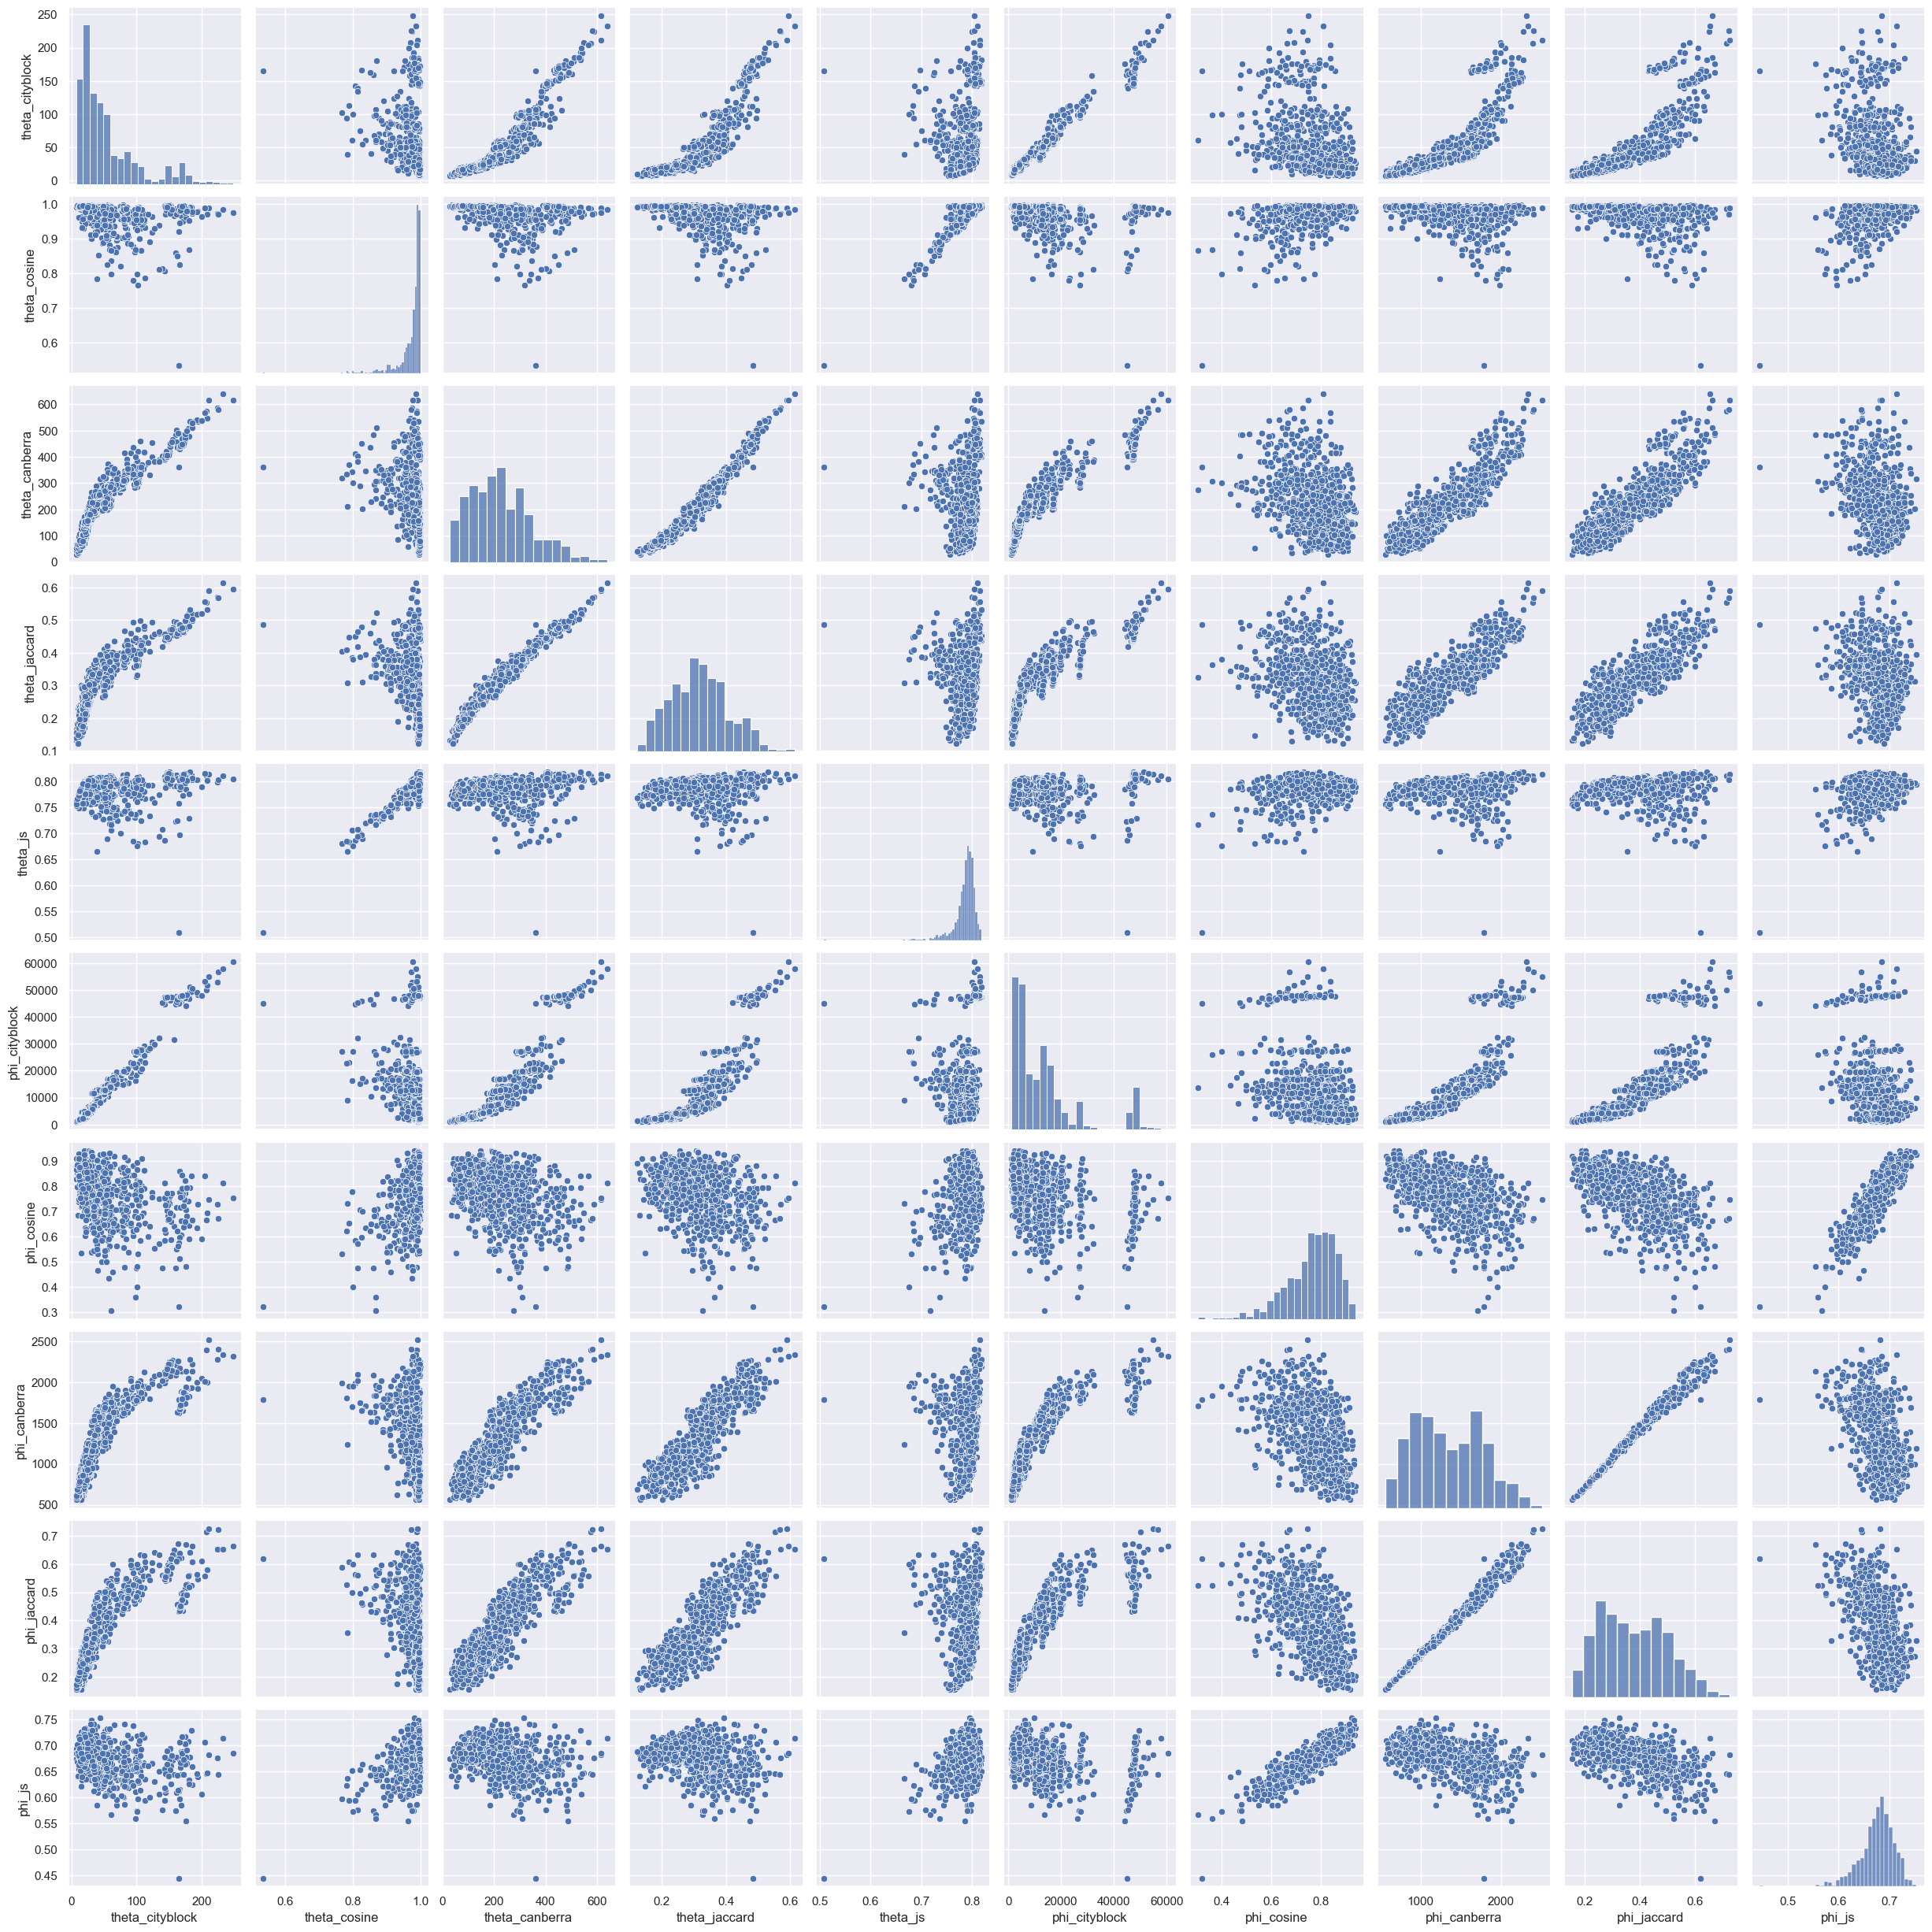

In [115]:
sns.pairplot(TPAIRS);

In [87]:
TPAIR_CORR = TPAIRS.corr()

In [88]:
for dmetric in 'js cosine canberra jaccard cityblock'.split():
    a = f"phi_{dmetric}"
    b = f"theta_{dmetric}"
    print(dmetric, TPAIR_CORR.loc[a, b])

js 0.3956342316356885
cosine 0.4471712613460102
canberra 0.8864195695076398
jaccard 0.8563363021509689
cityblock 0.9835635949196259


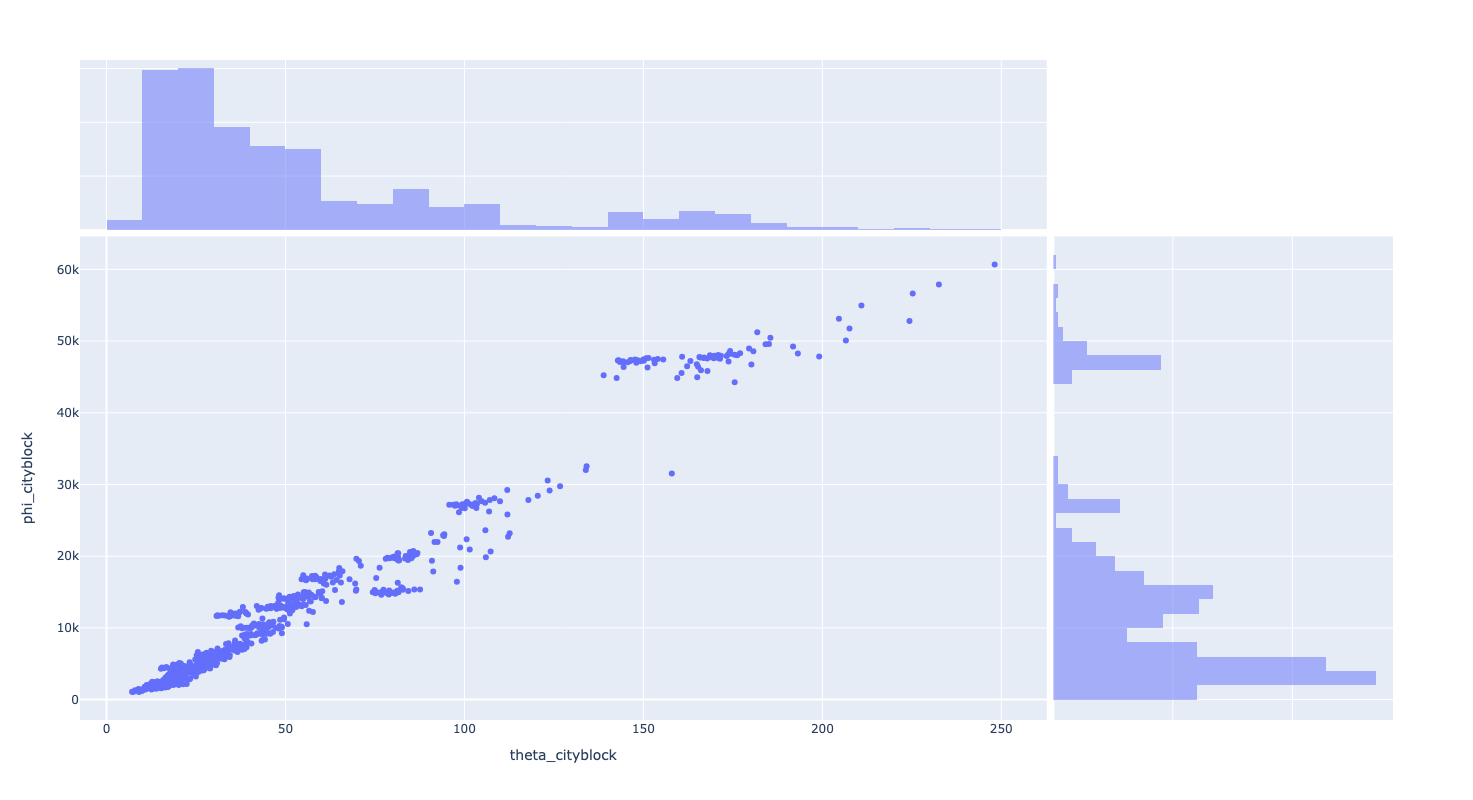

In [89]:
px.scatter(TPAIRS.reset_index(), 'theta_cityblock', 'phi_cityblock',
        hover_data=['topic_id_x','topic_id_y'],
        marginal_x = 'histogram', marginal_y = 'histogram',
        height=800, width=800)

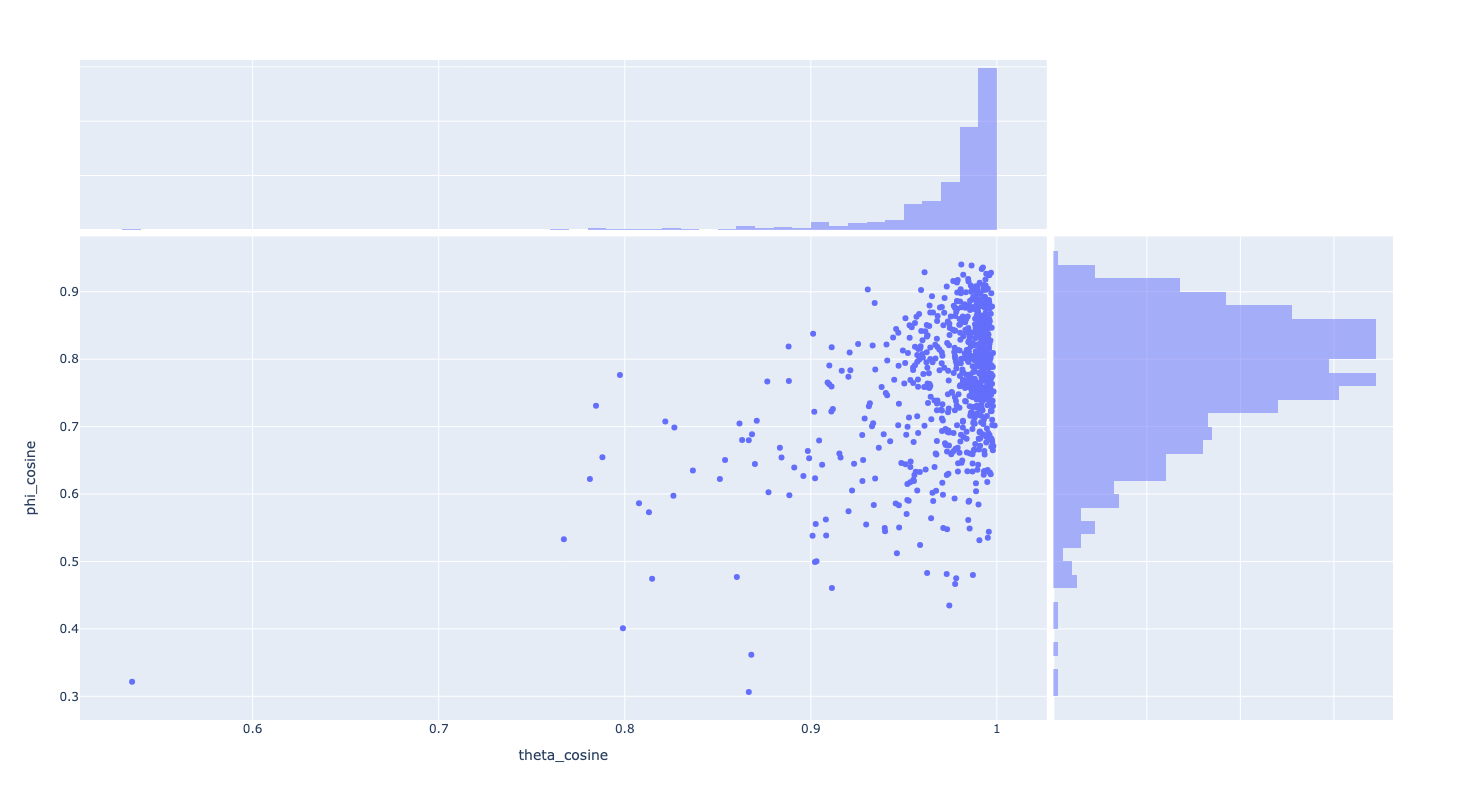

In [90]:
px.scatter(TPAIRS.reset_index(), 'theta_cosine', 'phi_cosine',
        hover_data=['topic_id_x','topic_id_y'],
        marginal_x = 'histogram', marginal_y = 'histogram',
        height=800, width=800)

# Clutser Topics

Use PHI and THETA as vector spaces to cluster topics.

In [91]:
TOPICS['label'] = TOPICS.author.str.upper() + ' ' + TOPICS.index + ' ' + TOPICS.top_terms

In [92]:
TOPICS.label.sample(5)

topic_id
T27    MELVILLE T27 man hand ship gentlemen time sort...
T08    MELVILLE T08 feet man head crown tail blade co...
T21    MELVILLE T21 brigantine ship sailors ships sea...
T23    AUSTEN T23 time letter sister feelings heart m...
T16    MELVILLE T16 doctor time way round man island ...
Name: label, dtype: object

## By PHI

<Figure size 640x480 with 0 Axes>

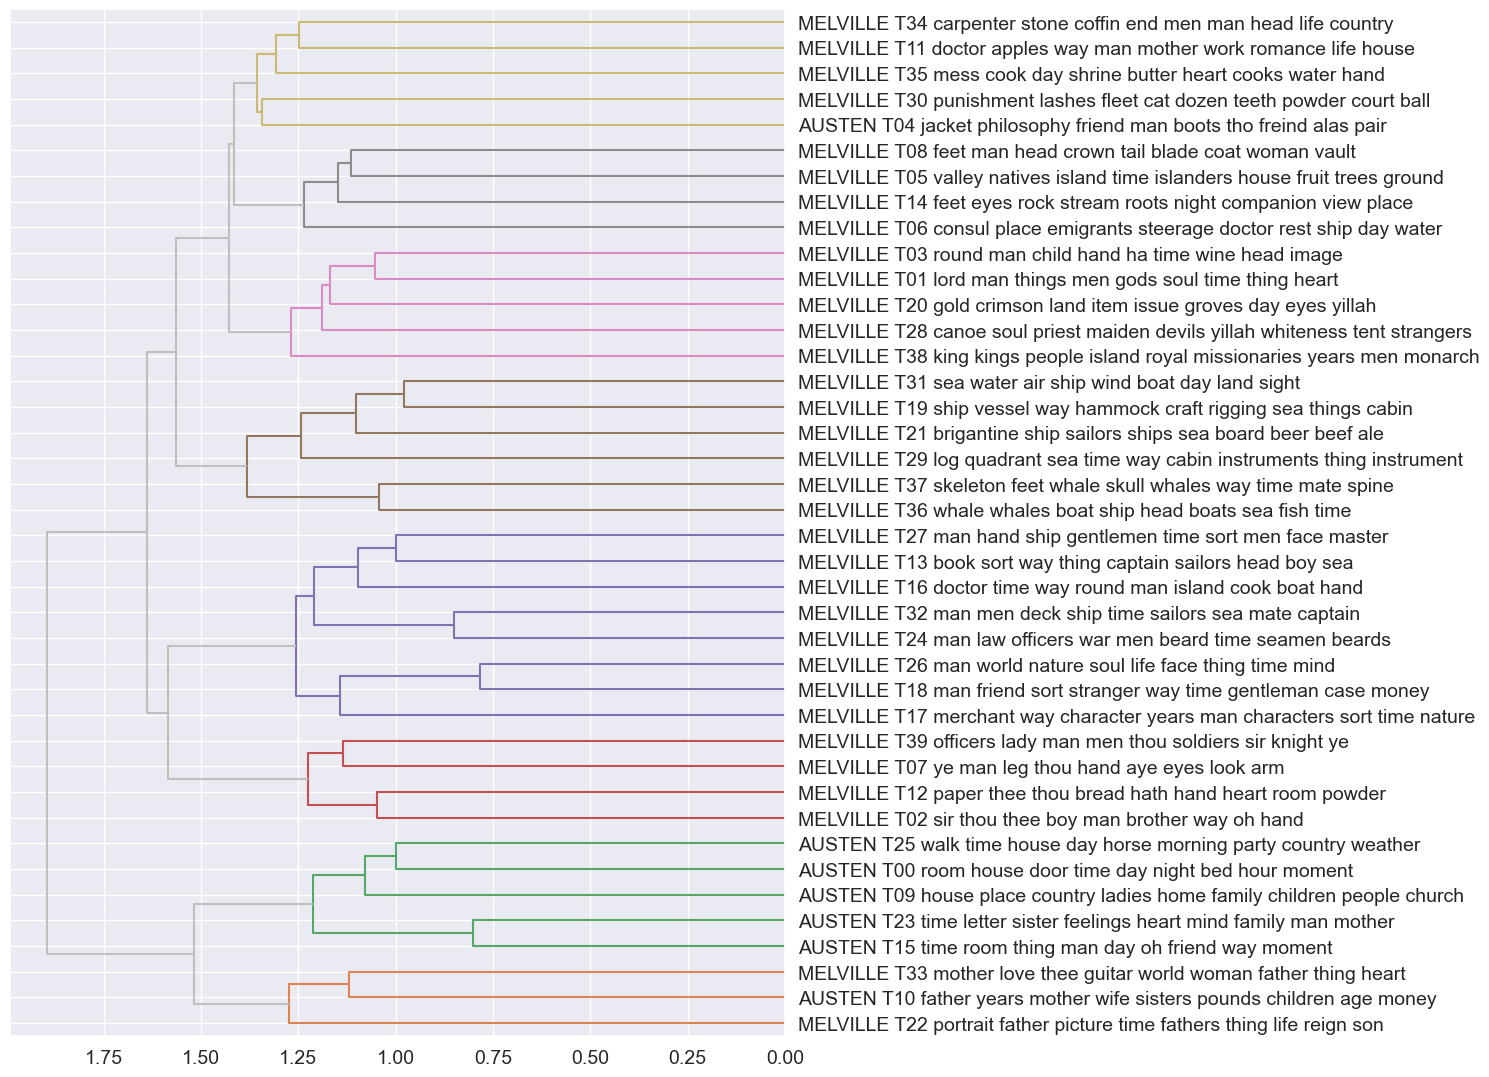

In [93]:
fig1 = HAC(PHI, labels=TOPICS.label.tolist())
fig1.color_thresh = 1.4
fig1.plot()

## By THETA

<Figure size 640x480 with 0 Axes>

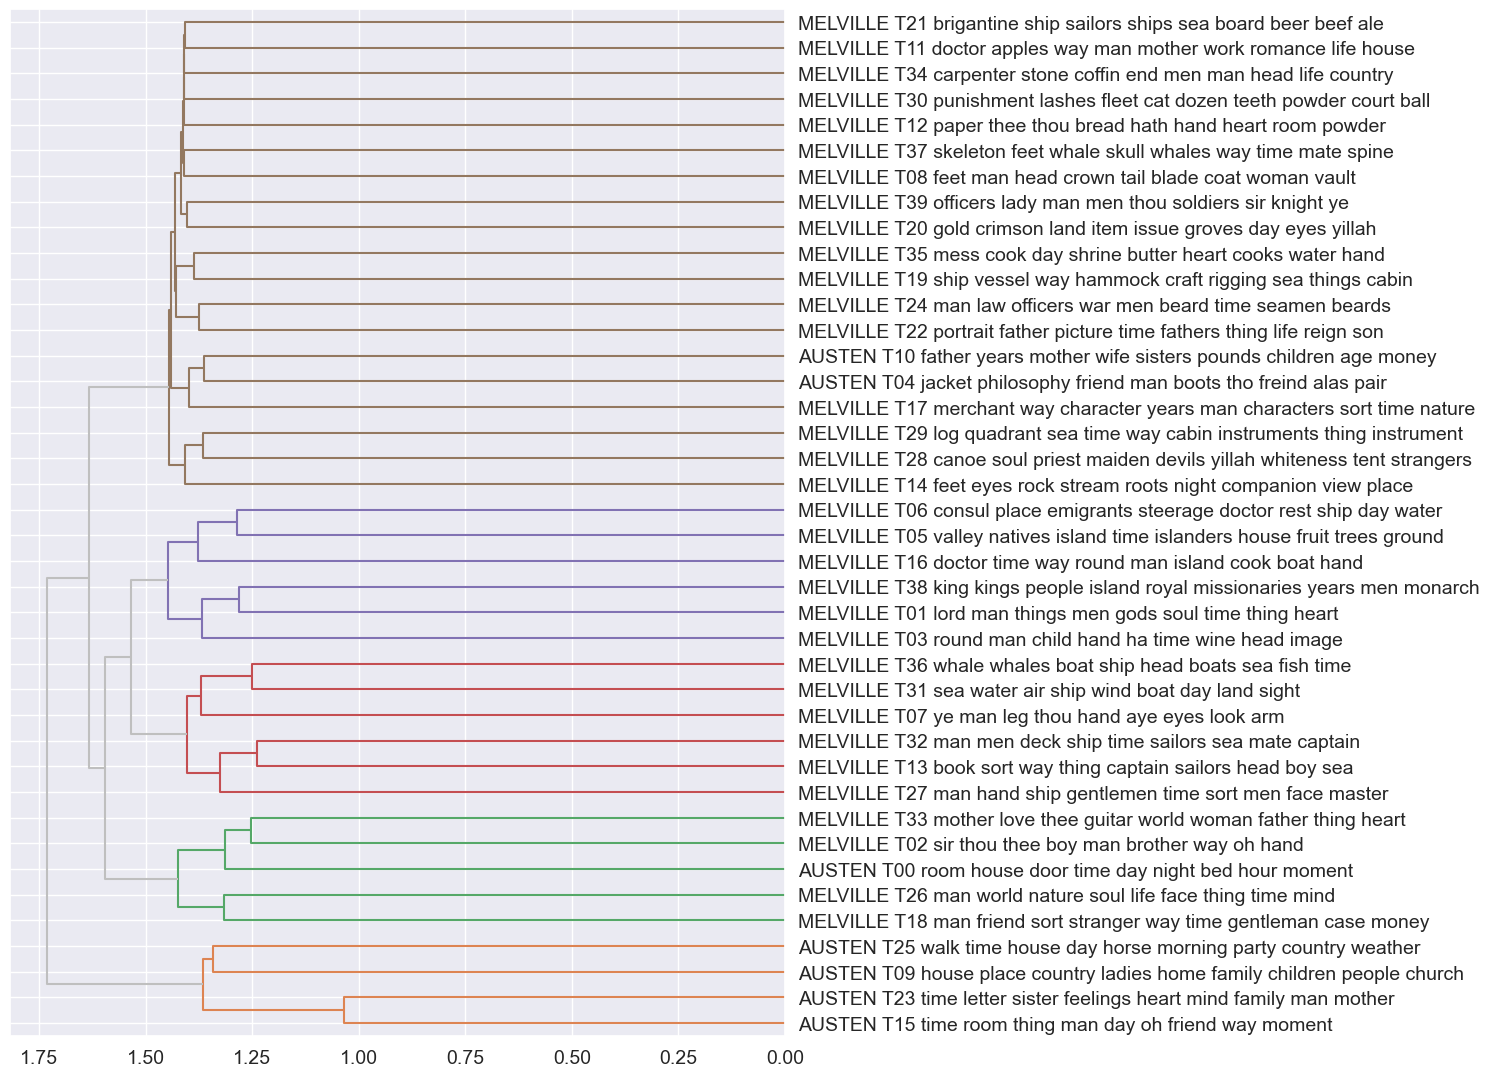

In [94]:
fig2 = HAC(THETA.T, labels=TOPICS.label.tolist())
fig2.color_thresh = 1.5
fig2.plot()

# PCA of Topics

## By PHI

In [95]:
pca_engine_phi = PCA(2)

In [96]:
PHI_COMPS = pd.DataFrame(pca_engine_phi.fit_transform(normalize(PHI, norm='l2', axis=1)), index=PHI.index)

<Figure size 640x480 with 0 Axes>

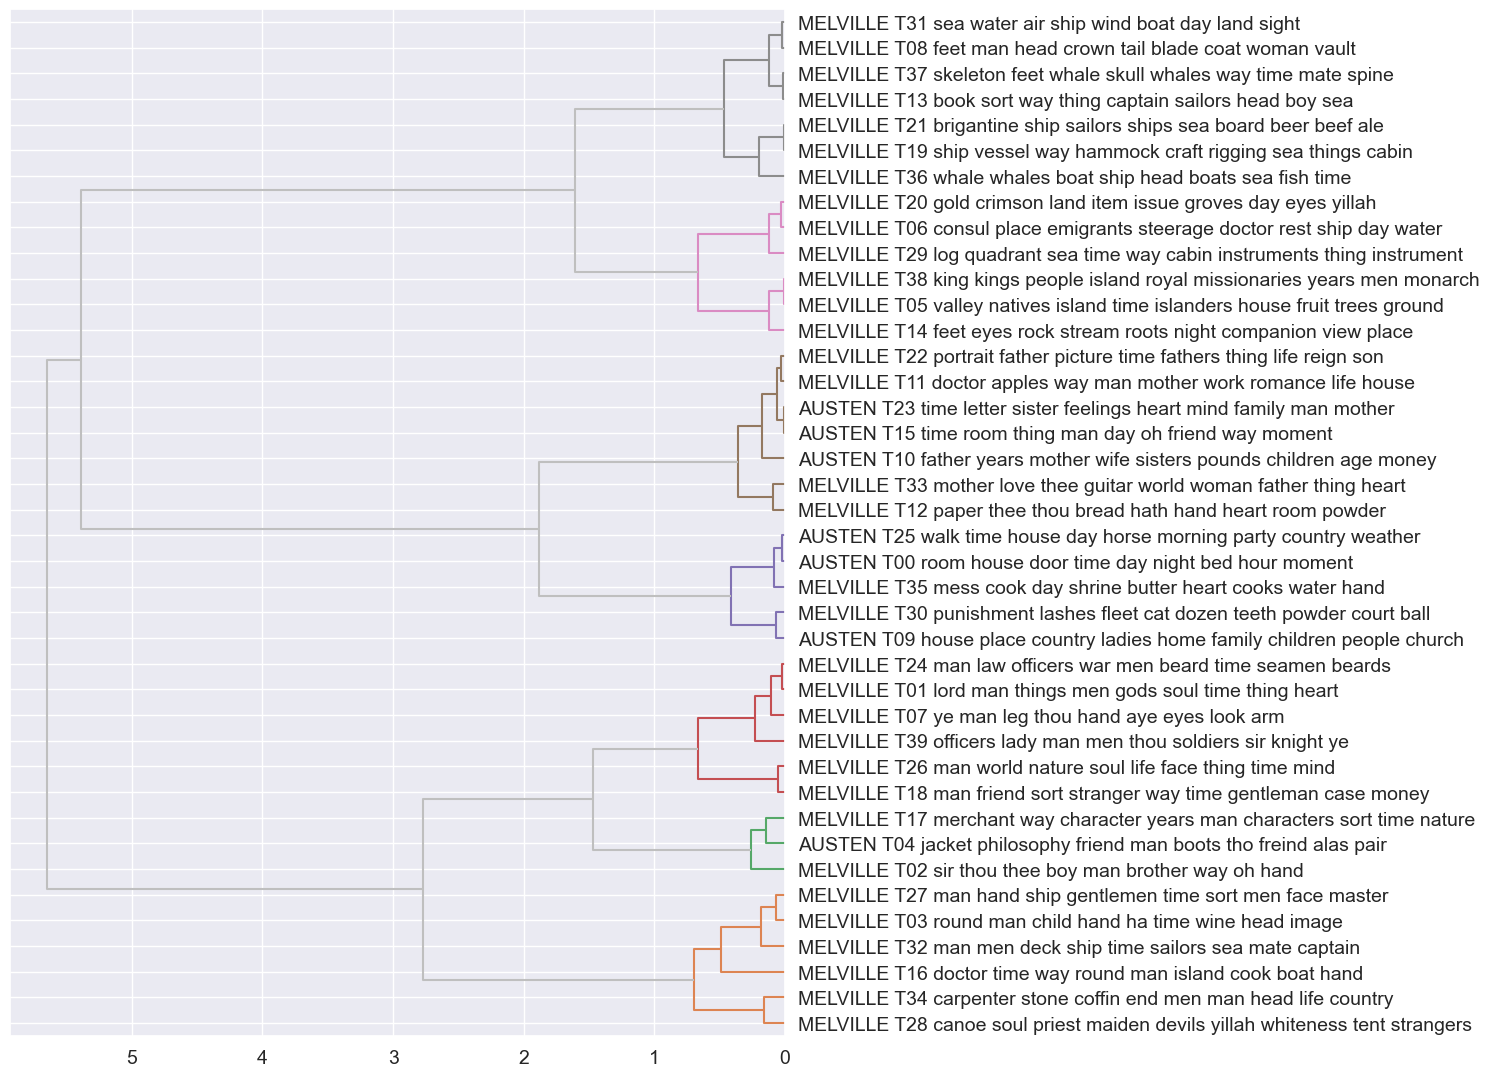

In [97]:
fig3 = HAC(PHI_COMPS, labels=TOPICS.label.tolist())
fig3.color_thresh = 1.4
fig3.plot()

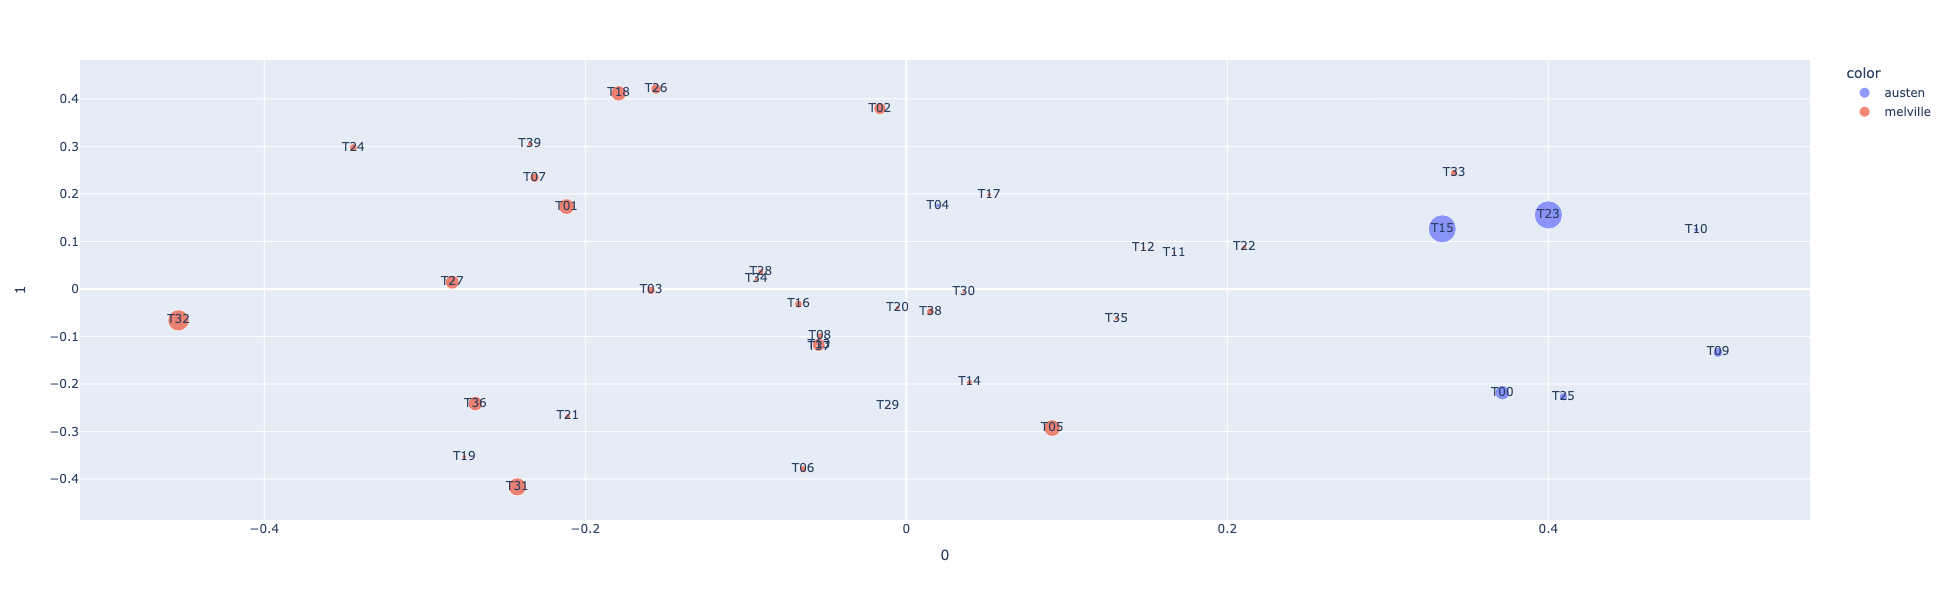

In [98]:
px.scatter(PHI_COMPS.reset_index(), 0, 1, 
           size=TOPICS.term_freq, 
           color=TOPICS.author, 
           text='topic_id', hover_name=TOPICS.label, height=600, width=700)

In [99]:
PHI_LOADINGS = pd.DataFrame(pca_engine_phi.components_.T * np.sqrt(pca_engine_phi.explained_variance_), index=PHI.T.index)
PHI_LOADINGS.index.name = 'term_str'

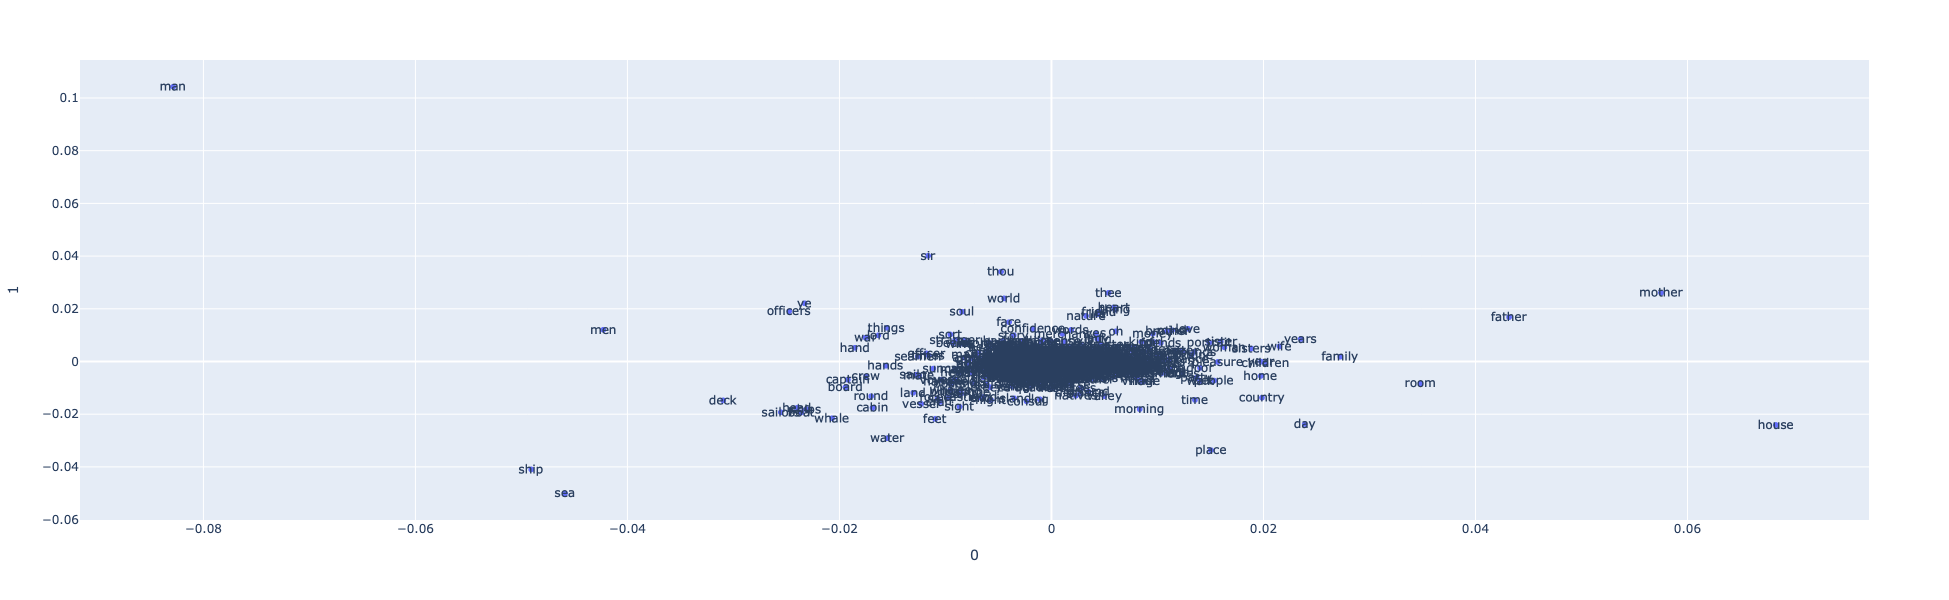

In [100]:
px.scatter(PHI_LOADINGS.reset_index(), 0, 1, text='term_str', height=600, width=700)

## By THETA

In [101]:
pca_engine_theta = PCA(5)

In [102]:
THETA_COMPS = pd.DataFrame(pca_engine_theta.fit_transform(normalize(THETA.T.values, norm='l2', axis=1)), index=THETA.T.index)
THETA_COMPS.index.name = 'topic_id'

<Figure size 640x480 with 0 Axes>

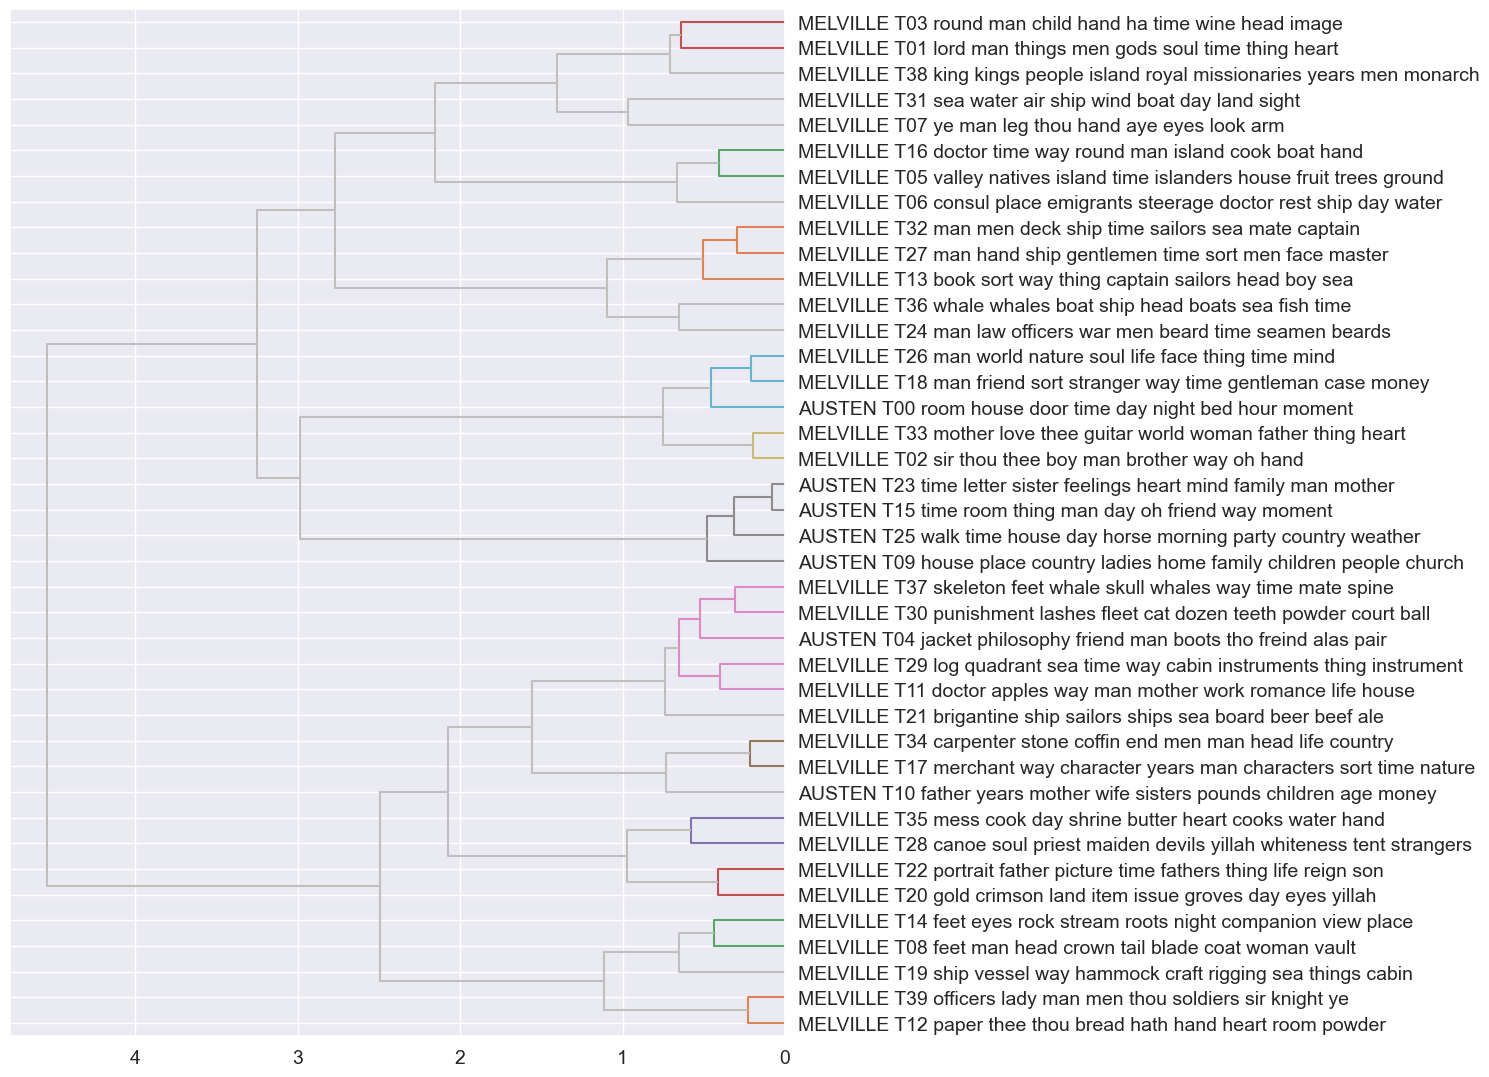

In [103]:
HAC(THETA_COMPS, labels=TOPICS.label.tolist()).plot()

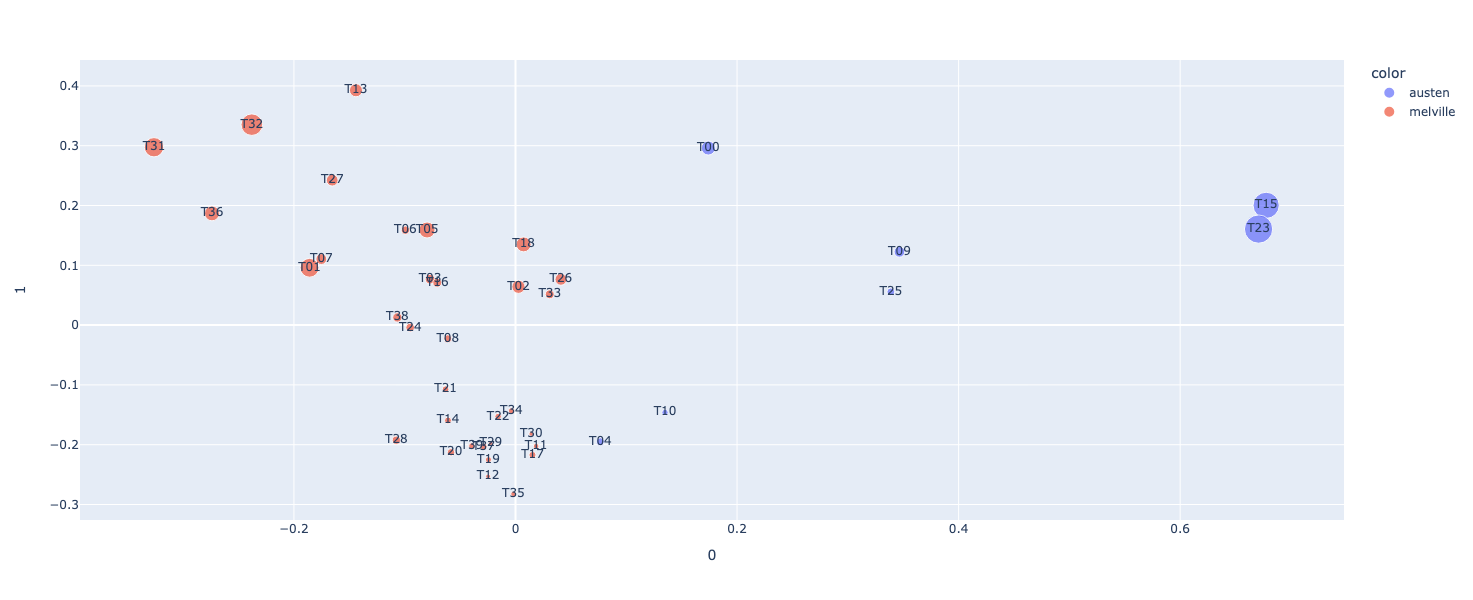

In [104]:
px.scatter(THETA_COMPS.reset_index(), 0, 1, 
           size=TOPICS.doc_weight_sum, color=TOPICS.author, 
           text='topic_id', hover_name=TOPICS.label, 
           height=600, width=700)

In [63]:
THETA_LOADINGS = pd.DataFrame(pca_engine_theta.components_.T * np.sqrt(pca_engine_theta.explained_variance_), index=THETA.index)

In [109]:
DOCS['doc_label'] = DOCS.apply(lambda x: f"{LIB.loc[x.name[0]].label}-{x.name[1]}", axis=1)
DOCS['book'] = DOCS.apply(lambda x: f"{LIB.loc[x.name[0]].label}", axis=1)
DOCS['n_chars'] = DOCS.doc_str.str.len()

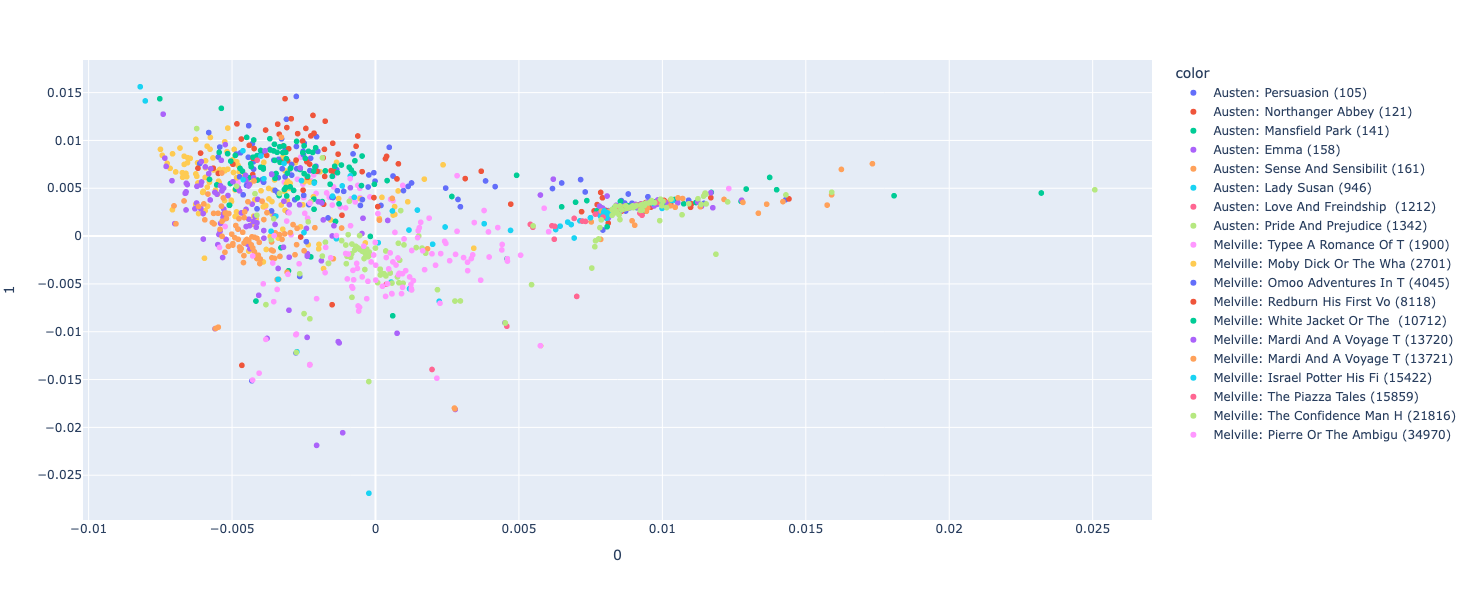

In [114]:
px.scatter(THETA_LOADINGS.reset_index(), 0, 1, 
           # size=DOCS.n_chars, 
           color=DOCS.book, 
           height=600, width=900)

# Save

In [113]:
TPAIRS.to_csv(f"{output_dir}/{data_prefix}-TOPICPAIRS-{n_topics}.csv", index=True)